# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [2]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
5,1,California,Texas,1760
6,1,California,Indiana,2194
7,1,Arizona,Texas,1009
8,1,Texas,Louisiana,432
9,1,Texas,Florida,873


DiGraph with 29 nodes and 72 edges


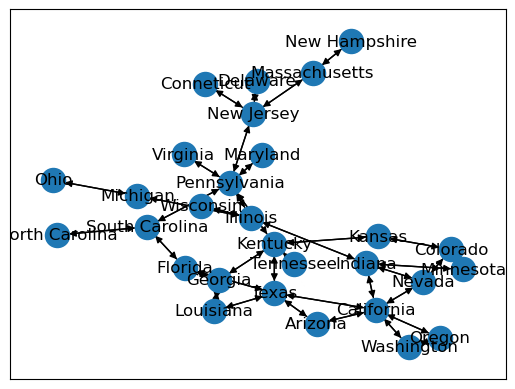

In [3]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
Mississippi_Graph = Mississippi_Graph.to_directed(as_view=False)
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [4]:
nx.shortest_path_length(Mississippi_Graph,'Louisiana','Michigan','Distance')

2635

In [5]:
nx.shortest_path_length(Mississippi_Graph,'Michigan','Ohio','Distance')

254

In [6]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [7]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [8]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [9]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [50]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df3

In [70]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [81]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [77]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [78]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [82]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [83]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1123.589987463836

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


In [69]:
Mississippi_Graph2= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance' )
a = nx.minimum_spanning_tree(Mississippi_Graph2, weight='Distance', algorithm='kruskal', ignore_nan=False)


DiGraph with 29 nodes and 56 edges


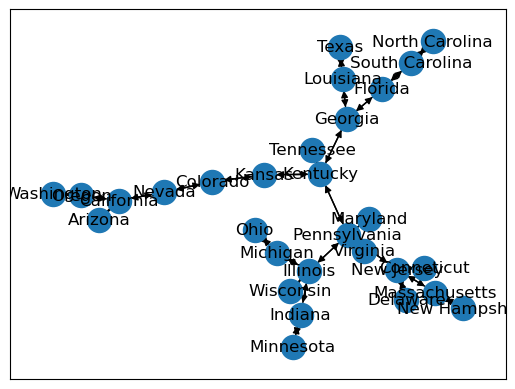

In [17]:
bb = a.to_directed(as_view=False)
nx.draw_networkx(bb,with_labels=True)
print(bb)

In [18]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,1638.786305
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
7,Louisiana,1244.380678
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,1638.786305,0.792094
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
16,Louisiana,0.000487,0.071429,1244.380678,0.043272


In [19]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,3536
27,Oregon,3379
26,California,2843
25,Nevada,2713
24,Arizona,2637
23,Colorado,1723
22,Texas,1628
21,Minnesota,1539
20,Louisiana,1495
19,Ohio,1394


Average shortest path to production center:


1228.892857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


In [20]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,1638.786305
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
7,Louisiana,1244.380678
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,1638.786305,0.792094
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
16,Louisiana,0.000487,0.071429,1244.380678,0.043272


In [21]:
Mississippi_Graph2= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')

In [22]:
a = Mississippi_Graph2.copy(as_view=False)
a.remove_node('North Carolina')
a.remove_node('South Carolina')
a.remove_node('New Hampshire')
a.remove_node('Massachusetts')
a.remove_node('Delaware')
a.remove_node('Conneticut')
a.remove_node('New Jersey')
a.remove_node('Maryland')
a.remove_node('Pennsylvania')
a.remove_node('Virginia')
a.remove_node('Illinois')
a.remove_node('Wisconsin')
a.remove_node('Michigan')
a.remove_node('Ohio')
a.remove_node('Indiana')
a.remove_node('Minnesota')
a.remove_node('Florida')
a.remove_node('Tennessee')
a.remove_node('Kentucky')
a.remove_node('Georgia')

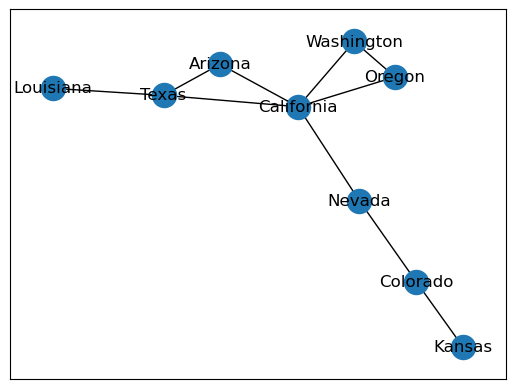

In [23]:
nx.draw_networkx(a, with_labels = True)

In [24]:
b = Mississippi_Graph2.copy(as_view=False)
b.remove_node('Florida')
b.remove_node('Washington')
b.remove_node('Oregon')
b.remove_node('California')
b.remove_node('Nevada')
b.remove_node('Indiana')
b.remove_node('Minnesota')
b.remove_node('Arizona')
b.remove_node('Colorado')
b.remove_node('Texas')
b.remove_node('Kansas')
b.remove_node('North Carolina')
b.remove_node('South Carolina')
b.remove_node('Tennessee')
b.remove_node('Kentucky')
b.remove_node('Illinois')
b.remove_node('Wisconsin')
b.remove_node('Louisiana')
b.remove_node('Georgia')
b.add_edge('Ohio','Pennsylvania',Distance=368)
b.add_edge('Pennsylvania','Ohio',Distance=368)
b.add_edge('Conneticut','Massachusetts',Distance=101)
b.add_edge('Massachusetts','Conneticut',Distance=101)
b.add_edge('Delaware','Pennsylvania',Distance=129)
b.add_edge('Pennsylvania','Delaware',Distance=129)

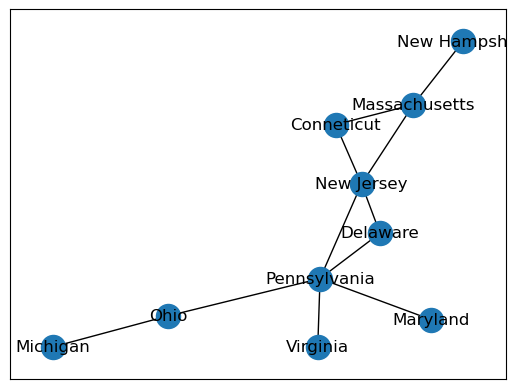

In [25]:
nx.draw_networkx(b, with_labels = True)

In [26]:
nx.shortest_path_length(b,'Ohio',weight='Distance')

{'Ohio': 0,
 'Michigan': 254,
 'Pennsylvania': 368,
 'Maryland': 480,
 'New Jersey': 495,
 'Delaware': 497,
 'Virginia': 588,
 'Conneticut': 675,
 'Massachusetts': 774,
 'New Hampshire': 842}

In [27]:
metrics_graph(graph=b,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
0,Pennsylvania,0.003255
3,New Jersey,0.003130
5,Delaware,0.002794
4,Conneticut,0.002501
1,Maryland,0.002458
6,Massachusetts,0.002147
2,Virginia,0.001989
7,New Hampshire,0.001901
9,Ohio,0.001810
8,Michigan,0.001285


Shortest path to production center:


,State,Shortest_path_to_production_facility
9,Michigan,622
8,New Hampshire,474
7,Massachusetts,406
6,Ohio,368
5,Conneticut,307
4,Virginia,220
3,Delaware,129
2,New Jersey,127
1,Maryland,112
0,Pennsylvania,0


Average shortest path to production center:


307.22222222222223

Betweenness centrality for all nodes:


,State,Betweenness_centrality
0,Pennsylvania,0.694444
3,New Jersey,0.500000
6,Massachusetts,0.222222
9,Ohio,0.222222
1,Maryland,0.000000
2,Virginia,0.000000
4,Conneticut,0.000000
5,Delaware,0.000000
7,New Hampshire,0.000000
8,Michigan,0.000000


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
0,Pennsylvania,1254.495601
3,New Jersey,636.872386
9,Ohio,455.181557
4,Conneticut,360.700966
6,Massachusetts,335.376359
5,Delaware,167.736796
8,Michigan,135.991914
2,Virginia,127.913026
1,Maryland,65.119359
7,New Hampshire,34.153585


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.003255,0.694444,1254.495601,2.835659
1,New Jersey,0.003130,0.500000,636.872386,0.996844
8,Ohio,0.001810,0.222222,455.181557,0.183061
5,Massachusetts,0.002147,0.222222,335.376359,0.160046
2,Delaware,0.002794,0.000000,167.736796,0.000000
3,Conneticut,0.002501,0.000000,360.700966,0.000000
4,Maryland,0.002458,0.000000,65.119359,0.000000
6,Virginia,0.001989,0.000000,127.913026,0.000000
7,New Hampshire,0.001901,0.000000,34.153585,0.000000
9,Michigan,0.001285,0.000000,135.991914,0.000000


In [28]:
c = Mississippi_Graph2.copy(as_view=False)
c.remove_node('Delaware')
c.remove_node('Conneticut')
c.remove_node('New Jersey')
c.remove_node('Washington')
c.remove_node('Oregon')
c.remove_node('California')
c.remove_node('Massachusetts')
c.remove_node('Maryland')
c.remove_node('Pennsylvania')
c.remove_node('Louisiana')
c.remove_node('Texas')
c.remove_node('Arizona')
c.remove_node('Nevada')
c.remove_node('Colorado')
c.remove_node('New Hampshire')
c.remove_node('Kansas')
c.remove_node('Michigan')
c.remove_node('Ohio')
c.remove_node('Virginia')

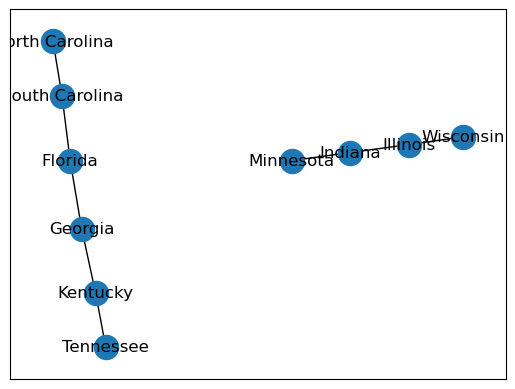

In [29]:
cc = nx.draw_networkx(c, with_labels = True)

In [30]:
Mississippi_Graph.number_of_nodes()

29

In [31]:
a.number_of_nodes()

9

In [32]:
b.number_of_nodes()

10

In [33]:
c.number_of_nodes()

10